# Ford GoBike Project: Communicate Data Findings
## by Che-Hsien Lin

## Preliminary Wrangling  

In this project, I will focus on the data of Ford GoBike from 2018 to February 2019.  

Ford GoBike Data: https://s3.amazonaws.com/fordgobike-data/index.html

In [72]:
# Import all packages and set plots to be embedded inline
from os import makedirs, listdir
import pandas as pd
from requests import get
from zipfile import ZipFile
from io import BytesIO
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
%matplotlib inline
import datetime
import calendar
import warnings
# suppress warnings from final output
warnings.simplefilter("ignore")

In [3]:
# Make a folder for saving csv files.
folder_csv = 'trip_csv_files'
makedirs(folder_csv)

In [4]:
# Download 2018 zip files and extract them.
for month in range(1,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    # Create the url and download zip files from it.
    bike_data_url_2018 = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response_2018 = get(bike_data_url_2018)
    
    # Open the zip files, and return readable and writeable view of the contents.
    unzipped_file_2018 = ZipFile(BytesIO(response_2018.content)) 
    
    # Put extracted zip file into folder trip_data_files.
    unzipped_file_2018.extractall(folder_csv)

In [5]:
# Download 2019 zip files and extract them (only January and February).
for month in range(1,3):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    # Create the url and download zip files from it.
    bike_data_url_2019 = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response_2019 = get(bike_data_url_2019)
    
    # Open the zip files, and return readable and writeable view of the contents.
    unzipped_file_2019 = ZipFile(BytesIO(response_2019.content))    
    
    # Put extracted zip file into folder trip_data_files.
    unzipped_file_2019.extractall(folder_csv)

In [6]:
# Combine all csv files to one data frame.
list_csvs = []
for file_name in listdir(folder_csv):
    list_csvs.append(pd.read_csv(folder_csv+'/'+file_name))
df = pd.concat(list_csvs)
df.to_csv('raw_data.csv', index=False)

In [7]:
# Examine DataFrame.
df = pd.read_csv('raw_data.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239215 entries, 0 to 2239214
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 273.3+ MB


In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [11]:
# Drop unwanted columns.
df = df.drop(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239215 entries, 0 to 2239214
Data columns (total 7 columns):
duration_sec         int64
start_time           object
end_time             object
bike_id              int64
user_type            object
member_birth_year    float64
member_gender        object
dtypes: float64(1), int64(2), object(4)
memory usage: 119.6+ MB


In [12]:
# Get member age and see value_counts.
df['member_age'] = 2019 - df['member_birth_year'] 
df['member_age'].value_counts().sort_values()

141.0         1
116.0         1
109.0         1
113.0         2
89.0          2
130.0         3
110.0         4
138.0         5
115.0        12
105.0        18
92.0         21
91.0         21
131.0        23
87.0         34
79.0         41
118.0        44
81.0         47
18.0         54
80.0         55
85.0         76
99.0         96
95.0        134
78.0        142
84.0        157
117.0       192
108.0       262
86.0        266
75.0        274
73.0        294
83.0        305
          ...  
54.0      24832
21.0      25548
47.0      26220
51.0      28056
48.0      28760
46.0      29138
22.0      33033
45.0      33879
43.0      34597
44.0      38928
41.0      43143
23.0      44291
42.0      44495
40.0      46287
38.0      58720
39.0      58915
24.0      65480
37.0      73484
25.0      77189
36.0      78417
35.0      85045
27.0      85496
33.0      92122
34.0      93777
28.0      95030
26.0      96654
29.0      99866
30.0     103060
32.0     103521
31.0     124016
Name: member_age, Length

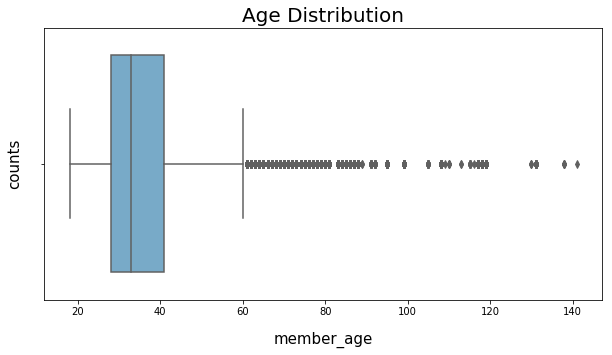

In [14]:
# View the age distribution from a boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x='member_age', data=df, palette='Blues', orient='h')
plt.title("Age Distribution", fontsize=20, y=1)
plt.xlabel("member_age", fontsize=15, labelpad=15)
plt.ylabel("counts", fontsize=15, labelpad=15);

In [15]:
# Filter the data which user_age <= 60 and drop 'member_birth_year' column.
df = df[df['member_age'] <= 60]
df = df.drop(['member_birth_year'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058548 entries, 0 to 2239214
Data columns (total 7 columns):
duration_sec     int64
start_time       object
end_time         object
bike_id          int64
user_type        object
member_gender    object
member_age       float64
dtypes: float64(1), int64(2), object(4)
memory usage: 125.6+ MB


In [16]:
df.member_gender.value_counts()

Male      1510996
Female     513992
Other       33560
Name: member_gender, dtype: int64

In [17]:
# Filter the data by keeping only male or female.
df = df[df['member_gender'] != 'Other']
df.member_gender.value_counts()

Male      1510996
Female     513992
Name: member_gender, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024988 entries, 0 to 2239214
Data columns (total 7 columns):
duration_sec     int64
start_time       object
end_time         object
bike_id          int64
user_type        object
member_gender    object
member_age       float64
dtypes: float64(1), int64(2), object(4)
memory usage: 123.6+ MB


In [19]:
df.to_csv('clean_data.csv', index=False)

### What is the structure of your dataset?

> There are 2,024,988 entries in the data frame which only includes member age <= 60 and the gender is male or female. The data contains time & duration & user_type & gender & age.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are gender, age, user type, time and duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think user_typer and time will help my investigation.

## Univariate Exploration

In [20]:
df = pd.read_csv('clean_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024988 entries, 0 to 2024987
Data columns (total 7 columns):
duration_sec     int64
start_time       object
end_time         object
bike_id          int64
user_type        object
member_gender    object
member_age       float64
dtypes: float64(1), int64(2), object(4)
memory usage: 108.1+ MB


In [21]:
# Change start_time and end_time data type to datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [22]:
# Generate 'date' columns.
df['start_time_date'] = df['start_time'].dt.date
df['end_time_date'] = df['end_time'].dt.date
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,member_age,start_time_date,end_time_date
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Subscriber,Male,33.0,2018-01-31,2018-02-01
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Customer,Male,23.0,2018-01-31,2018-02-01
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Subscriber,Male,28.0,2018-01-31,2018-02-01
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,Subscriber,Male,31.0,2018-01-31,2018-02-01
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Subscriber,Male,39.0,2018-01-31,2018-01-31


In [23]:
# Generate 'year_month' columns.
df['start_time_year_month'] = df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month'] = df['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [24]:
# Generate 'year' and 'month' columns then change the data type to int.
df['start_time_year'] = df['start_time'].dt.year.astype(int)
df['end_time_year'] = df['end_time'].dt.year.astype(int)
df['start_time_month'] = df['start_time'].dt.month.astype(int)
df['end_time_month'] = df['end_time'].dt.month.astype(int)

In [25]:
# Generate 'hour_minute' and 'hour' columns.
df['start_time_hour_minute'] = df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute'] = df['end_time'].map(lambda x: x.strftime('%H-%m'))
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [26]:
# Generate 'weekday' and 'weekday_abbr' columns.
df['start_time_weekday'] = df['start_time'].dt.weekday_name
df['end_time_weekday'] = df['end_time'].dt.weekday_name
df['start_time_weekday_abbr'] = df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr'] = df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [27]:
# Generate a 'renamed' column for a better view on the chart.
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [28]:
# Generate a 'member_age_bin' column based on the different age range.
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [30]:
# Generate duration_min from duration_sec for a better readable purpose.
df['duration_min'] = df['duration_sec']/60

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024988 entries, 0 to 2024987
Data columns (total 26 columns):
duration_sec                     int64
start_time                       datetime64[ns]
end_time                         datetime64[ns]
bike_id                          int64
user_type                        object
member_gender                    object
member_age                       float64
start_time_date                  object
end_time_date                    object
start_time_year_month            object
end_time_year_month              object
start_time_year                  int32
end_time_year                    int32
start_time_month                 int32
end_time_month                   int32
start_time_hour_minute           object
end_time_hour_minute             object
start_time_hour                  int64
end_time_hour                    int64
start_time_weekday               object
end_time_weekday                 object
start_time_weekday_abbr          objec

In [32]:
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,member_age,start_time_date,end_time_date,start_time_year_month,...,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr,start_time_year_month_renamed,member_age_bins,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Subscriber,Male,33.0,2018-01-31,2018-02-01,2018-01,...,19-02,22,19,Wednesday,Thursday,Wed,Thu,18-01,30 - 40,1254.733333
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Customer,Male,23.0,2018-01-31,2018-02-01,2018-01,...,10-02,14,10,Wednesday,Thursday,Wed,Thu,18-01,20 - 30,1192.933333
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Subscriber,Male,28.0,2018-01-31,2018-02-01,2018-01,...,06-02,19,6,Wednesday,Thursday,Wed,Thu,18-01,20 - 30,666.100000
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,Subscriber,Male,31.0,2018-01-31,2018-02-01,2018-01,...,00-02,23,0,Wednesday,Thursday,Wed,Thu,18-01,30 - 40,7.550000
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Subscriber,Male,39.0,2018-01-31,2018-01-31,2018-01,...,23-01,23,23,Wednesday,Wednesday,Wed,Wed,18-01,30 - 40,3.000000


## Question: What is the trend of bike rides for different age groups, genders, weekdays, and hours of a day?

### Distrubition of age groups

In [33]:
# Create a new data frame for bike rides of different age groups.
trip_by_age_df = df.groupby('member_age_bins').agg({'bike_id': 'count'})
trip_by_age_df

,bike_id
member_age_bins,
10 - 20,26237
20 - 30,715915
30 - 40,799138
40 - 50,317861
50 - 60,165837


In [34]:
# Create a new column for calculating the percentage of bike rides of different age groups.
trip_by_age_df['perc'] = (trip_by_age_df['bike_id'] / trip_by_age_df['bike_id'].sum())*100
trip_by_age_df

,bike_id,perc
member_age_bins,,
10 - 20,26237,1.295662
20 - 30,715915,35.354037
30 - 40,799138,39.463839
40 - 50,317861,15.696933
50 - 60,165837,8.189530


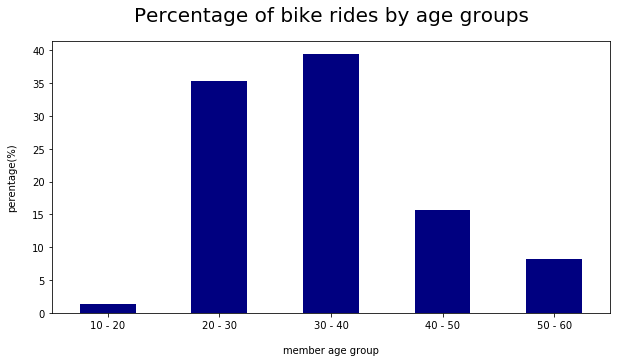

In [35]:
# Create a bar chart of bike rides based on different age group.
trip_by_age_df['perc'].plot(kind='bar', color='navy', figsize=(10,5))
plt.title('Percentage of bike rides by age groups', fontsize=20, y=1.05)
plt.xlabel('member age group', labelpad=15)
plt.ylabel('perentage(%)', labelpad=15)
plt.xticks(rotation=360);

### Distribution of genders

In [36]:
# Create a new data frame for bike rides of different genders.
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})
trip_by_gender_df

,bike_id
member_gender,
Female,513992
Male,1510996


In [37]:
# Create a new column for calculating the percentage of bike rides of different genders.
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id'] / trip_by_gender_df['bike_id'].sum())*100
trip_by_gender_df

,bike_id,perc
member_gender,,
Female,513992,25.382471
Male,1510996,74.617529


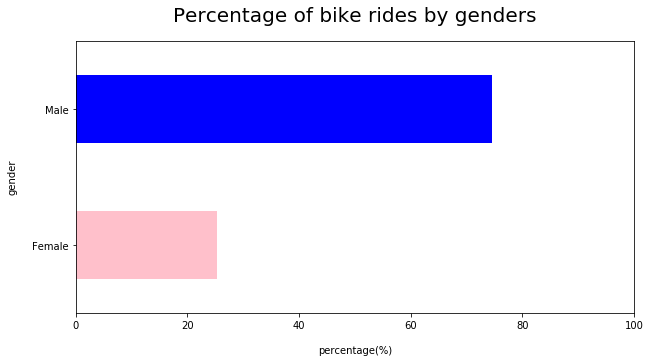

In [71]:
# Create a barchart-h base on different genders
barh_color = ['pink','blue']
trip_by_gender_df['perc'].plot(kind='barh', color=barh_color, figsize=(10,5))
plt.title('Percentage of bike rides by genders', fontsize=20, y=1.05)
plt.xlabel('percentage(%)', labelpad=15)
plt.ylabel('gender', labelpad=15)
plt.xticks(rotation=360)
plt.xlim(0,100); # Show 100% as limit for a better overview.

### Distribution of weekday

In [39]:
# Create a new data frame for bike rides of different weekdays.
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
trip_by_weekday_df

,bike_id
start_time_weekday_abbr,
Fri,316028
Mon,320447
Sat,176984
Sun,154877
Thu,355209
Tue,350991
Wed,350452


In [40]:
# Create a new column for calculating the percentage of bike rides of different weekdays.
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id'] / trip_by_weekday_df['bike_id'].sum())*100
trip_by_weekday_df

,bike_id,perc
start_time_weekday_abbr,,
Fri,316028,15.606413
Mon,320447,15.824637
Sat,176984,8.740002
Sun,154877,7.648292
Thu,355209,17.541289
Tue,350991,17.332992
Wed,350452,17.306374


In [41]:
# Create a correct index for weekday.
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

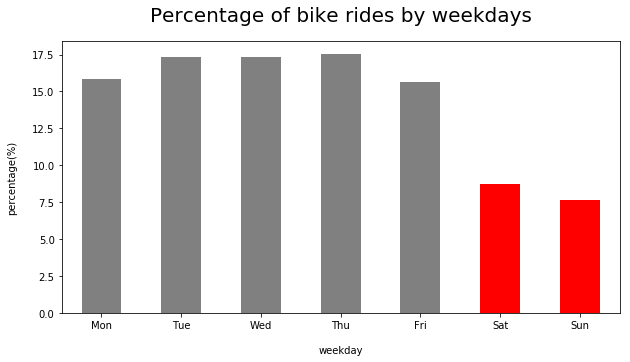

In [70]:
# Create a barchart based on different weekday.
weekday_color = ['grey', 'grey', 'grey', 'grey', 'grey', 'red', 'red'] # Show the weekend as red color.
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=weekday_color, figsize=(10,5))
plt.title('Percentage of bike rides by weekdays', fontsize=20, y=1.05)
plt.xlabel('weekday', labelpad=15)
plt.ylabel('percentage(%)', labelpad=15)
plt.xticks(rotation=360);

### Distribution of hours of a day

In [43]:
trip_by_hour_df = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()
trip_by_hour_df.head()

,start_time_hour,bike_id
0,0,11037
1,1,6339
2,2,3911
3,3,2245
4,4,2382


In [44]:
trip_by_hour_df['perc'] = (trip_by_hour_df['bike_id'] / trip_by_hour_df['bike_id'].sum())*100
trip_by_hour_df.head()

,start_time_hour,bike_id,perc
0,0,11037,0.545040
1,1,6339,0.313039
2,2,3911,0.193137
3,3,2245,0.110865
4,4,2382,0.117630


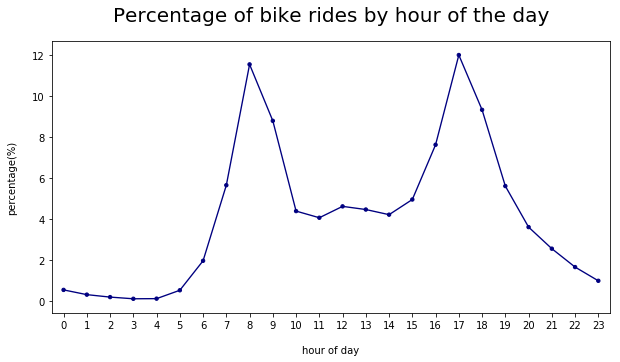

In [69]:
# Create a pointchart based on different hour of a day.
plt.figure(figsize=(10,5))
sns.pointplot(data=trip_by_hour_df, x='start_time_hour', y='perc', scale=0.5, color='navy')
plt.title('Percentage of bike rides by hour of the day', fontsize=20, y=1.05)
plt.xlabel('hour of day', labelpad=15)
plt.ylabel('percentage(%)', labelpad=15)
plt.xticks(rotation=360);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Regarding ride counts, it is much higher during the weekday than during the weekend; 7-9 am and 5-7 pm are the peak hour; Male users are 3 times more than females users. Age 20-40 is the major user group.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I only kept the major group of the data which includes the member age <= 60 because some of the member age in the original data don't make senese. In gender, I onl kept male or female for the purpose of reducing ambuguity. I transformed start_time and end_time into datetime format, and broke them into smaller units for convenience of drawing charts.

## Bivariate Exploration

## Question: Are there any behavioral differences between subscriber and non-subscribers?

In [46]:
# Create a dataframe for calculating the bike-ride counts of user_type.
count_of_user_type = df.groupby('user_type').size().reset_index(name='count')
count_of_user_type['perc'] = count_of_user_type['count'] / len(df) *100 # Counting percentage of each user type
count_of_user_type

,user_type,count,perc
0,Customer,228562,11.287079
1,Subscriber,1796426,88.712921


In [47]:
# Create a data frame for calculating the counts per user type and year_month.
count_of_user_type_per_year = df.groupby(['start_time_year_month_renamed', 'user_type']).size().reset_index()

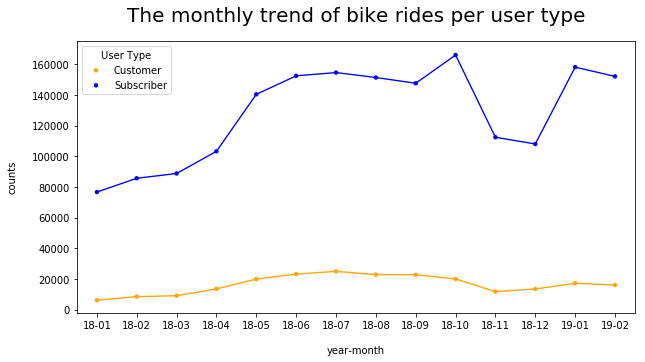

In [66]:
# Create a pointchart for showing the trend of bike-ride counts for different user type.
plt.figure(figsize=(10,5))
palette = {'Subscriber': 'blue', 'Customer': 'orange'}
ax = sns.pointplot(data=count_of_user_type_per_year, x='start_time_year_month_renamed', y=0, hue='user_type', palette=palette, scale=0.5)
plt.title('The monthly trend of bike rides per user type', fontsize=20, y=1.05)
plt.xlabel('year-month', labelpad=15)
plt.ylabel('counts', labelpad=15)
legend = ax.legend()
legend.set_title('User Type');

### Average trip duration of subscribers & customers

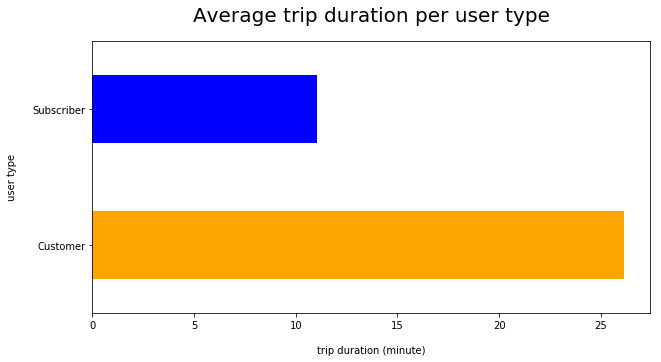

In [67]:
barh_color = ['orange', 'blue']
df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=barh_color, figsize=(10,5))
plt.title('Average trip duration per user type', fontsize=20, y=1.05)
plt.xlabel('trip duration (minute)', labelpad=15)
plt.ylabel('user type', labelpad=15)
plt.xticks(rotation=360);

In [50]:
# Create a data frame for viewing only user_type and duration.
user_type_duration_df = df.loc[:,['user_type', 'duration_min']]
user_type_duration_df.describe()

,duration_min
count,2.024988e+06
mean,1.272914e+01
std,3.187541e+01
min,1.016667e+00
25%,5.683333e+00
50%,8.950000e+00
75%,1.385000e+01
max,1.438017e+03


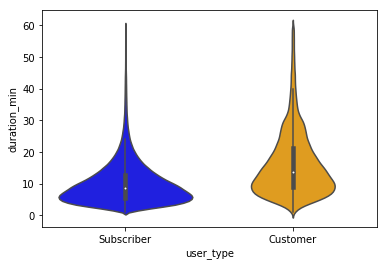

In [68]:
# Create a violin plot for the major group to have a better view of the distribution.
user_type_duration_df_60 = user_type_duration_df[user_type_duration_df['duration_min'] <= 60]
sns.violinplot(data=user_type_duration_df_60, x='user_type', y='duration_min', palette=palette);

### The trend of subscribers' & customers' rides per age group

In [52]:
# Create a data frame for calculating bike-ride counts of subscribers per age group over year-month.
subscriber_df = df[df['user_type'] == 'Subscriber'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

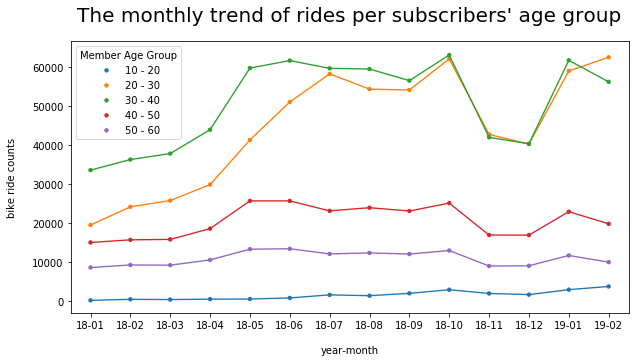

In [53]:
# Generate a pointplot for viewing the trend of bike rides for subscribers.
plt.figure(figsize=(10,5))
ax = sns.pointplot(data=subscriber_df, x='start_time_year_month_renamed', y='bike_id', scale=0.5, hue='member_age_bins')
plt.title("The monthly trend of rides per subscribers' age group", fontsize=20, y=1.05)
plt.xlabel('year-month', labelpad=15)
plt.ylabel('bike ride counts', labelpad=15)
plt.xticks(rotation=360)
legend = ax.legend()
legend.set_title('Member Age Group');

In [54]:
df['user_type'].value_counts()

Subscriber    1796426
Customer       228562
Name: user_type, dtype: int64

In [55]:
# Create a data frame for calculating bike-ride counts of customers per age group over year-month.
customer_df = df[df['user_type'] == 'Customer'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()
customer_df.head()

,start_time_year_month_renamed,member_age_bins,bike_id
0,18-01,10 - 20,102
1,18-01,20 - 30,2180
2,18-01,30 - 40,2612
3,18-01,40 - 50,783
4,18-01,50 - 60,388


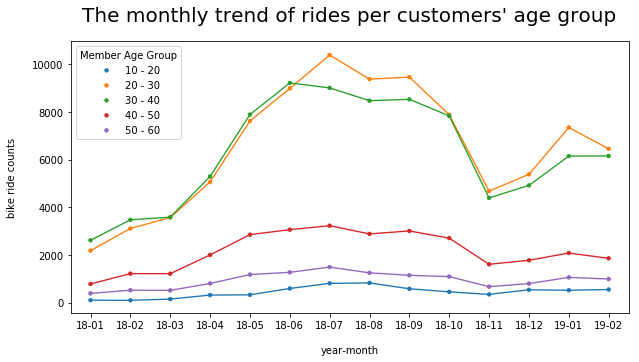

In [56]:
# Generate a pointplot for viewing the trend of bike rides for customers.
plt.figure(figsize=(10,5))
ax = sns.pointplot(data=customer_df, x='start_time_year_month_renamed', y='bike_id', scale=0.5, hue='member_age_bins')
plt.title("The monthly trend of rides per customers' age group", fontsize=20, y=1.05)
plt.xlabel('year-month', labelpad=15)
plt.ylabel('bike ride counts', labelpad=15)
plt.xticks(rotation=360)
legend = ax.legend()
legend.set_title('Member Age Group');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are about 89% of subscribers and and 11 % customers. Subscribers tend to ride more often but the duration of each ride is shorter. I guess this is because the pricing plan for single ride, access pass, and monthly membership changes the user behaviors.  https://www.fordgobike.com/pricing

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The overall trend of bike-ride counts  was moving upward from 18-01 to 19-02. There was a spike during 18-03 and 18-07 espeially for the major groups (age 20-40).

## Multivariate Exploration

> I will investigate more about the subscribers by analyzing the relationships among different age groups, weekday, and hour of a day.

In [57]:
# Creating new data frames for different age groups of subscribers.
subscriber_df_1 = df[(df['member_age'] >= 20) & (df['member_age'] < 30) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_df_2 = df[(df['member_age'] >= 30) & (df['member_age'] < 40) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_df_3 = df[(df['member_age'] >= 40) & (df['member_age'] < 50) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_df_4 = df[(df['member_age'] >= 50) & (df['member_age'] <= 60) & (df['user_type'] =='Subscriber') & (df['start_time_hour'] > 5)].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id':'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
start_time_weekday_abbr    126 non-null object
start_time_hour            126 non-null int64
count                      126 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [58]:
# Change weekday abbr to categorical.
subscriber_df_1['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_1['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
subscriber_df_2['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_2['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
subscriber_df_3['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_3['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
subscriber_df_4['start_time_weekday_abbr'] = pd.Categorical(subscriber_df_4['start_time_weekday_abbr'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
subscriber_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
start_time_weekday_abbr    126 non-null category
start_time_hour            126 non-null int64
count                      126 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.5 KB


In [59]:
# Create a column for calculating the count percentage.
subscriber_df_1['count_perc'] = subscriber_df_1['count'].apply(lambda x: (x/subscriber_df_1['count'].sum())*100)
subscriber_df_2['count_perc'] = subscriber_df_2['count'].apply(lambda x: (x/subscriber_df_2['count'].sum())*100)
subscriber_df_3['count_perc'] = subscriber_df_3['count'].apply(lambda x: (x/subscriber_df_3['count'].sum())*100)
subscriber_df_4['count_perc'] = subscriber_df_4['count'].apply(lambda x: (x/subscriber_df_4['count'].sum())*100)
subscriber_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
start_time_weekday_abbr    126 non-null category
start_time_hour            126 non-null int64
count                      126 non-null int64
count_perc                 126 non-null float64
dtypes: category(1), float64(1), int64(2)
memory usage: 3.5 KB


In [60]:
# Create a rank column based on the count_perc and make the data type as int.
subscriber_df_1['rank'] = subscriber_df_1['count_perc'].rank(ascending=False).astype(int)
subscriber_df_2['rank'] = subscriber_df_2['count_perc'].rank(ascending=False).astype(int)
subscriber_df_3['rank'] = subscriber_df_3['count_perc'].rank(ascending=False).astype(int)
subscriber_df_4['rank'] = subscriber_df_4['count_perc'].rank(ascending=False).astype(int)
subscriber_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
start_time_weekday_abbr    126 non-null category
start_time_hour            126 non-null int64
count                      126 non-null int64
count_perc                 126 non-null float64
rank                       126 non-null int32
dtypes: category(1), float64(1), int32(1), int64(2)
memory usage: 4.0 KB


In [61]:
# Create a pivot table for the heatmap based on start_time_hour, weekday, and rank.
subscriber_df_1_pivot = subscriber_df_1.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_df_2_pivot = subscriber_df_2.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_df_3_pivot = subscriber_df_3.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_df_4_pivot = subscriber_df_4.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')
subscriber_df_1_pivot

start_time_weekday_abbr,Mon,Tue,Wed,Thu,Fri,Sat,Sun
start_time_hour,,,,,,,
6,110,101,104,107,113,125,126
7,30,25,26,27,37,123,124
8,7,1,2,3,8,112,120
9,19,15,17,16,18,98,109
10,60,51,43,41,47,90,94
11,89,82,81,76,73,55,70
12,71,74,65,61,62,45,59
13,83,86,69,77,67,40,46
14,93,92,91,85,84,42,44


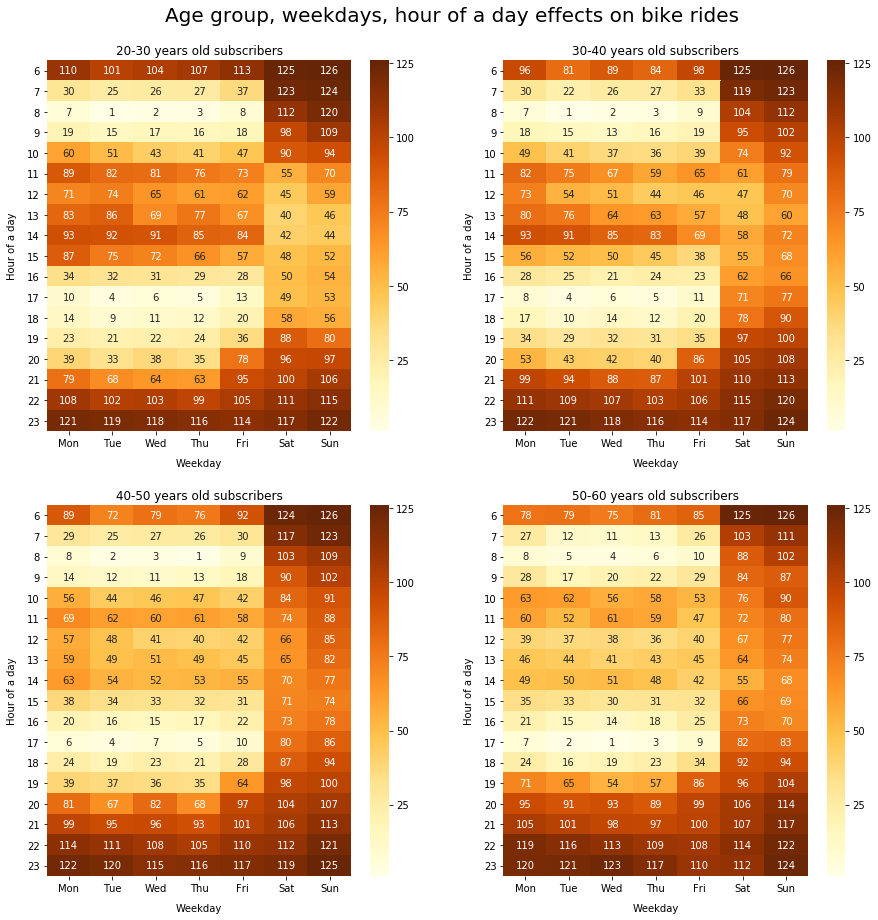

In [62]:
# Create for heatmaps for four different age groups based on rank, weekday, and hour of a day. Higher the rank, brighter the color, means users rode more often in the time zone.
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.suptitle('Age group, weekdays, hour of a day effects on bike rides', fontsize=20, y=0.93)
sns.heatmap(subscriber_df_1_pivot, fmt='d', annot=True, cmap='YlOrBr', annot_kws={'size': 10})
plt.title('20-30 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360)

plt.subplot(222)
sns.heatmap(subscriber_df_2_pivot, fmt='d', annot=True, cmap='YlOrBr', annot_kws={'size': 10})
plt.title('30-40 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360)

plt.subplot(223)
sns.heatmap(subscriber_df_3_pivot, fmt='d', annot=True, cmap='YlOrBr', annot_kws={'size': 10})
plt.title('40-50 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360)

plt.subplot(224)
sns.heatmap(subscriber_df_4_pivot, fmt='d', annot=True, cmap='YlOrBr', annot_kws={'size': 10})
plt.title('50-60 years old subscribers')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour of a day', labelpad=10)
plt.yticks(rotation=360);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I chose to investigate subscribers' relationships among age groups, weekday, and the hour of a day. I generated a heatmap based on the rank and values above. The heat maps of four age groups all show that the peak hours are during 7-9 am and 5-7 pm from Monday to Friday, which is generally the time of commuting and working. During the weekend, people behaved differently. They rode much less than the weekday and no longer rode much during commuting time. 

### Were there any interesting or surprising interactions between features?

> In the group of age 40-60, the color distribution of the heatmap shows that higher rate of the people rode during non-commuting hours.